### Assignment 08: Flight Data

#### Steps
- Analyze the data
- Create a processing pipeline. 
- We are interested if we can predict whether a flight gets delayed (i.e., arr_delay). 
- Models to use with gridsearch
    - logistic regression
    - decision tree
    - SVM
- Discuss the performance of each model. 
- Fit an ensemble using the three above models. 
- Fit a model using AdaBoost. 

### Question to Answer
- Does the ensemble model you used improve performance? 
- Does the AdaBoost model you used improve performance?

--- 
#### Exploritory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"data/flight-data.csv")
df.head(20)

,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,temp,...,precip,pressure,visib,type,manufacturer,model,engines,seats,engine,arr_delay
0,B6,1201,N643JB,JFK,FLL,135.0,1069,21,50,73.04,...,0.0,1019.4,10.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,Turbo-fan,1.0
1,DL,1773,N3743H,JFK,LAS,287.0,2248,15,35,71.06,...,0.0,1020.4,10.0,Fixed wing multi engine,BOEING,737-832,2.0,189.0,Turbo-jet,0.0
2,EV,4572,N11107,EWR,GSP,84.0,594,15,9,78.80,...,0.0,NaN,5.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,Turbo-fan,1.0
3,B6,179,N526JB,JFK,PHX,305.0,2153,17,35,44.06,...,0.0,1009.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,US,1733,N162UW,LGA,CLT,78.0,544,7,53,69.98,...,0.0,1021.3,10.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-211,2.0,199.0,Turbo-jet,0.0
5,UA,1519,N16701,EWR,STT,199.0,1634,9,22,57.92,...,0.0,1030.1,10.0,Fixed wing multi engine,BOEING,737-724,2.0,149.0,Turbo-jet,0.0
6,UA,436,N471UA,EWR,FLL,138.0,1065,20,0,78.98,...,0.0,1016.2,10.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2.0,200.0,Turbo-fan,1.0
7,UA,322,N844UA,LGA,CLE,67.0,419,15,35,82.94,...,0.0,1012.8,10.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-131,2.0,179.0,Turbo-jet,0.0
8,WN,124,N7741C,LGA,MDW,105.0,725,9,30,60.08,...,0.0,1024.0,10.0,Fixed wing multi engine,BOEING,737-7BD,2.0,149.0,Turbo-fan,0.0
9,B6,1443,N348JB,EWR,PBI,152.0,1023,17,24,33.98,...,0.0,1023.8,10.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2.0,20.0,Turbo-fan,1.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier       10000 non-null  object 
 1   flight        10000 non-null  int64  
 2   tailnum       9926 non-null   object 
 3   origin        10000 non-null  object 
 4   dest          10000 non-null  object 
 5   air_time      9716 non-null   float64
 6   distance      10000 non-null  int64  
 7   hour          10000 non-null  int64  
 8   minute        10000 non-null  int64  
 9   temp          9952 non-null   float64
 10  dewp          9952 non-null   float64
 11  humid         9952 non-null   float64
 12  wind_dir      9731 non-null   float64
 13  wind_speed    9951 non-null   float64
 14  wind_gust     2387 non-null   float64
 15  precip        9954 non-null   float64
 16  pressure      8808 non-null   float64
 17  visib         9954 non-null   float64
 18  type          8499 non-null

**Note: There are several columns/features that are stored as objects. There are also many null entries.** 

In [3]:
df.isna().sum()

carrier            0
flight             0
tailnum           74
origin             0
dest               0
air_time         284
distance           0
hour               0
minute             0
temp              48
dewp              48
humid             48
wind_dir         269
wind_speed        49
wind_gust       7613
precip            46
pressure        1192
visib             46
type            1501
manufacturer    1501
model           1501
engines         1501
seats           1501
engine          1501
arr_delay        284
dtype: int64

 **The dataframe has a depth of 10,000 entries and columns = [manufacturer, model, engines, seats, engine] are missing 1,500 entries.While "wind_gust" is missing 7613 entries** 

array([[<AxesSubplot:title={'center':'flight'}>,
        <AxesSubplot:title={'center':'air_time'}>,
        <AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'minute'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'dewp'}>,
        <AxesSubplot:title={'center':'humid'}>],
       [<AxesSubplot:title={'center':'wind_dir'}>,
        <AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'wind_gust'}>,
        <AxesSubplot:title={'center':'precip'}>],
       [<AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'visib'}>,
        <AxesSubplot:title={'center':'engines'}>,
        <AxesSubplot:title={'center':'seats'}>],
       [<AxesSubplot:title={'center':'arr_delay'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

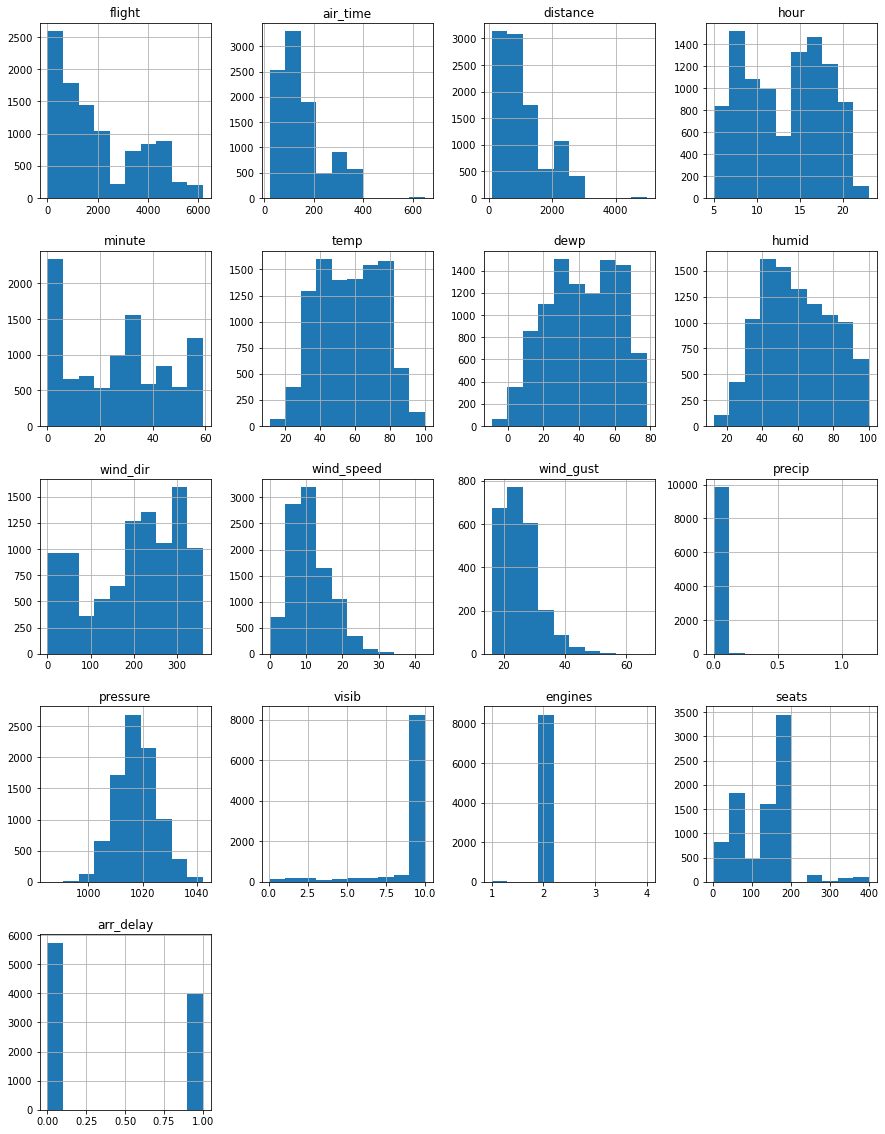

In [4]:
df.hist(figsize=(15,20))

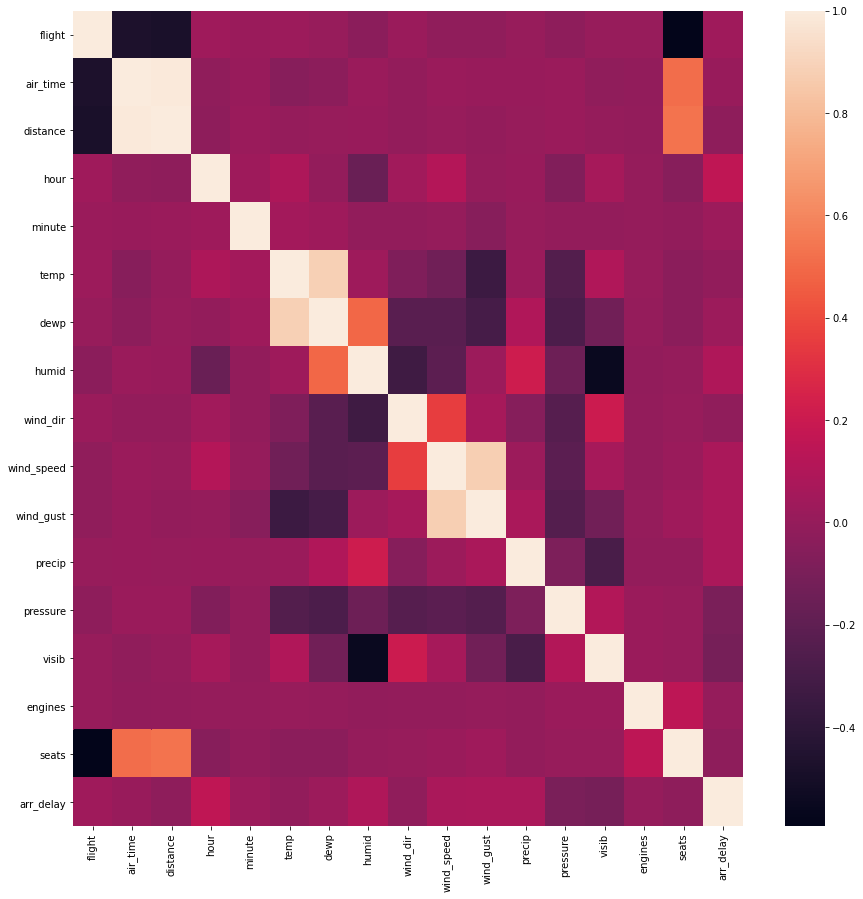

In [5]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(df.corr())
plt.show()

**The columns "air_time" and "distance" seems redundant. They have colinearity. 

In [6]:
# df.plot(figsize=(15,40), subplots=True, grid=True)

---
### Formating the Data 
We need remove all unneccessary columns from the dataset before we train our models. To do so we must identify those that pertaiain to flight delays only. The columns currently present in the dataframe are: 

In [7]:
rm_list = ["tailnum", "air_time", "flight", "seats", "hour", "minute", "wind_gust"]
for col in df.columns:
    if col in rm_list:
        print(f"\u274C Column: {col:<15} Datatype: {df[col].dtype}")
    else: 
        print(f"\u2705 Column: {col:<15} Datatype: {df[col].dtype}")

import copy

data = copy.deepcopy(df.drop(columns=rm_list))

✅ Column: carrier         Datatype: object
❌ Column: flight          Datatype: int64
❌ Column: tailnum         Datatype: object
✅ Column: origin          Datatype: object
✅ Column: dest            Datatype: object
❌ Column: air_time        Datatype: float64
✅ Column: distance        Datatype: int64
❌ Column: hour            Datatype: int64
❌ Column: minute          Datatype: int64
✅ Column: temp            Datatype: float64
✅ Column: dewp            Datatype: float64
✅ Column: humid           Datatype: float64
✅ Column: wind_dir        Datatype: float64
✅ Column: wind_speed      Datatype: float64
❌ Column: wind_gust       Datatype: float64
✅ Column: precip          Datatype: float64
✅ Column: pressure        Datatype: float64
✅ Column: visib           Datatype: float64
✅ Column: type            Datatype: object
✅ Column: manufacturer    Datatype: object
✅ Column: model           Datatype: object
✅ Column: engines         Datatype: float64
❌ Column: seats           Datatype: float64
✅ C

In [8]:
thresh = round(len(data.columns)*.6)
# print(thresh)
data = data.dropna()
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7241 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier       7241 non-null   object 
 1   origin        7241 non-null   object 
 2   dest          7241 non-null   object 
 3   distance      7241 non-null   int64  
 4   temp          7241 non-null   float64
 5   dewp          7241 non-null   float64
 6   humid         7241 non-null   float64
 7   wind_dir      7241 non-null   float64
 8   wind_speed    7241 non-null   float64
 9   precip        7241 non-null   float64
 10  pressure      7241 non-null   float64
 11  visib         7241 non-null   float64
 12  type          7241 non-null   object 
 13  manufacturer  7241 non-null   object 
 14  model         7241 non-null   object 
 15  engines       7241 non-null   float64
 16  engine        7241 non-null   object 
 17  arr_delay     7241 non-null   float64
dtypes: float64(10), int64(1), ob

In [9]:
def to_num(cols):
    for col in cols:
        print("\n", col, "\n")
        names = data[col].unique()
        for i,name in zip(range(1,len(names)+1), names):
            print(f"({i}) \t {name}")

            data[col] = data[col].apply(lambda x: i if x == name else x)
    return data

non_num_cols = ["carrier", "origin", "dest", "type", "manufacturer", "model", "engine"]
data = to_num(non_num_cols)


 carrier 

(1) 	 B6
(2) 	 DL
(3) 	 US
(4) 	 UA
(5) 	 WN
(6) 	 EV
(7) 	 9E
(8) 	 MQ
(9) 	 VX
(10) 	 AA
(11) 	 FL
(12) 	 YV
(13) 	 AS
(14) 	 HA
(15) 	 F9
(16) 	 OO

 origin 

(1) 	 JFK
(2) 	 LGA
(3) 	 EWR

 dest 

(1) 	 FLL
(2) 	 LAS
(3) 	 CLT
(4) 	 STT
(5) 	 CLE
(6) 	 MDW
(7) 	 PBI
(8) 	 MSP
(9) 	 ATL
(10) 	 SDF
(11) 	 PIT
(12) 	 OMA
(13) 	 BUF
(14) 	 RIC
(15) 	 DCA
(16) 	 SAT
(17) 	 AUS
(18) 	 DTW
(19) 	 BOS
(20) 	 PWM
(21) 	 SEA
(22) 	 PHL
(23) 	 SFO
(24) 	 IAD
(25) 	 BTV
(26) 	 DAY
(27) 	 IAH
(28) 	 CHS
(29) 	 SYR
(30) 	 MKE
(31) 	 CVG
(32) 	 MIA
(33) 	 LAX
(34) 	 SAN
(35) 	 PHX
(36) 	 DEN
(37) 	 SLC
(38) 	 MCO
(39) 	 ORD
(40) 	 DFW
(41) 	 PDX
(42) 	 ALB
(43) 	 SJU
(44) 	 TPA
(45) 	 RDU
(46) 	 RSW
(47) 	 MSY
(48) 	 ROC
(49) 	 BWI
(50) 	 BGR
(51) 	 MHT
(52) 	 LGB
(53) 	 SRQ
(54) 	 GSO
(55) 	 JAX
(56) 	 CAK
(57) 	 BNA
(58) 	 MCI
(59) 	 ABQ
(60) 	 HOU
(61) 	 SAV
(62) 	 HNL
(63) 	 STL
(64) 	 BHM
(65) 	 SNA
(66) 	 DSM
(67) 	 SMF
(68) 	 TUL
(69) 	 CMH
(70) 	 ORF
(71) 	 BUR
(72) 	 MEM
(73)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7241 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier       7241 non-null   int64  
 1   origin        7241 non-null   int64  
 2   dest          7241 non-null   int64  
 3   distance      7241 non-null   int64  
 4   temp          7241 non-null   float64
 5   dewp          7241 non-null   float64
 6   humid         7241 non-null   float64
 7   wind_dir      7241 non-null   float64
 8   wind_speed    7241 non-null   float64
 9   precip        7241 non-null   float64
 10  pressure      7241 non-null   float64
 11  visib         7241 non-null   float64
 12  type          7241 non-null   int64  
 13  manufacturer  7241 non-null   int64  
 14  model         7241 non-null   int64  
 15  engines       7241 non-null   float64
 16  engine        7241 non-null   int64  
 17  arr_delay     7241 non-null   float64
dtypes: float64(10), int64(8)
mem

--- 
### Logistic Regression Model


In [11]:
from sklearn.model_selection import train_test_split

def data_splits(y_col, **kwargs):
    y = data[y_col]
    X = data[[i for i in data.columns if i != y_col]]
    return train_test_split(X, y, random_state=10, test_size=0.2)

X_train, X_test, y_train, y_test = data_splits("arr_delay")
print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 5,792
Test examples: 1,449


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LogReg_pipeline = Pipeline([
    ('scaling', StandardScaler()), 
    ('pca', PCA(n_components=5)),
     ('logreg', LogisticRegression(penalty='l2', solver='liblinear'))])
    
param_grid = [{'logreg__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
   'pca__n_components': [1,2,3,4,5,6,7,8,9,10]}]

LogReg_GCV = GridSearchCV(estimator=LogReg_pipeline, 
                          param_grid=param_grid, scoring="f1")

LogReg_GCV = LogReg_GCV.fit(X_train, y_train)

def model_eval(model): 
    print(model.best_estimator)
    print(model.best_score_)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.63      0.96      0.76       888
         1.0       0.62      0.11      0.18       561

    accuracy                           0.63      1449
   macro avg       0.62      0.53      0.47      1449
weighted avg       0.62      0.63      0.54      1449



---
### Decision Tree Model